In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


We won't split data because of 2 resons:

1) the task is check bluffing of new employee

2) Ne have not enough data to train model after splitting

In [4]:
# Fitting Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# Fitting Polinomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
X_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

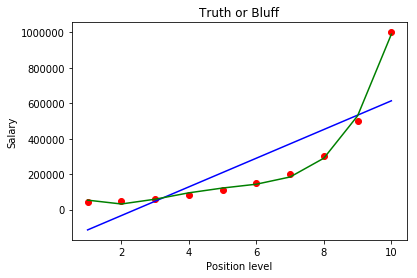

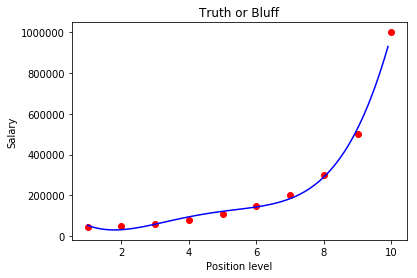

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
# Predicting with both models
regressor.predict(np.array(6.5).reshape(-1, 1))

array([ 330378.78787879])

In [15]:
lin_reg.predict(poly_reg.fit_transform(np.array(6.5).reshape(-1, 1)))

array([ 158862.45265155])